In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Average out results from different runs
file_pattern = 'avl_trees/avl_tree_set_metrics_1k_*.csv'
all_files = glob.glob(file_pattern)

# Read each file into a DataFrame and store them in a list
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Extract the 'index' and 'duration' columns from each DataFrame
durations_list = [df[['index', 'duration']] for df in df_list]

# Combine the DataFrames by merging them on the 'index' column
combined_df = pd.concat(durations_list, axis=1)

# Calculate the mean duration for each insertion index
average_durations = combined_df.loc[:, combined_df.columns.str.contains('duration')].mean(axis=1)

# Create a DataFrame for the averaged results
averaged_df = pd.DataFrame({
    'index': combined_df['index'].iloc[:, 0],  # Use the 'index' from the first DataFrame
    'duration': average_durations
})

print(averaged_df['duration'].describe())

### Average insertion time of uuid keys in Hash Tables across 1000 operations

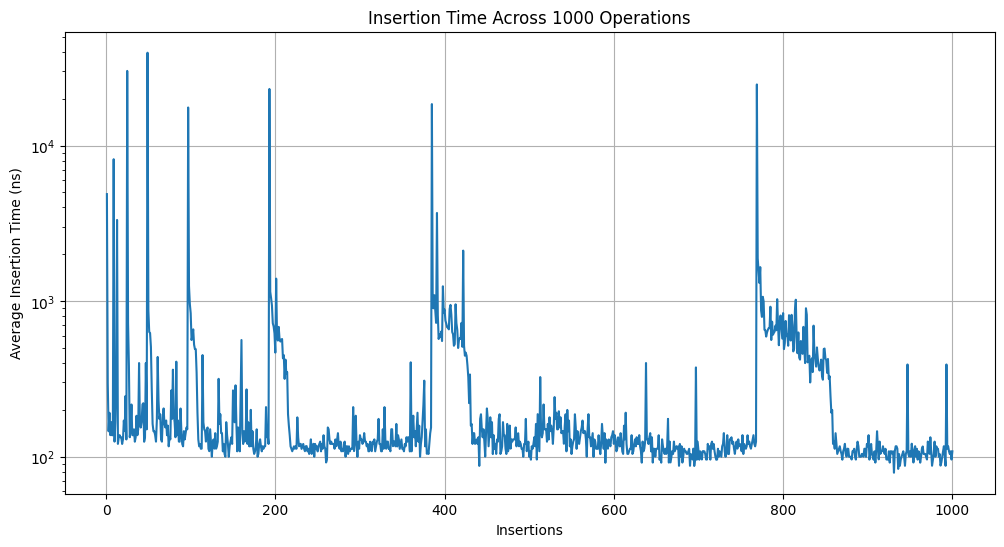

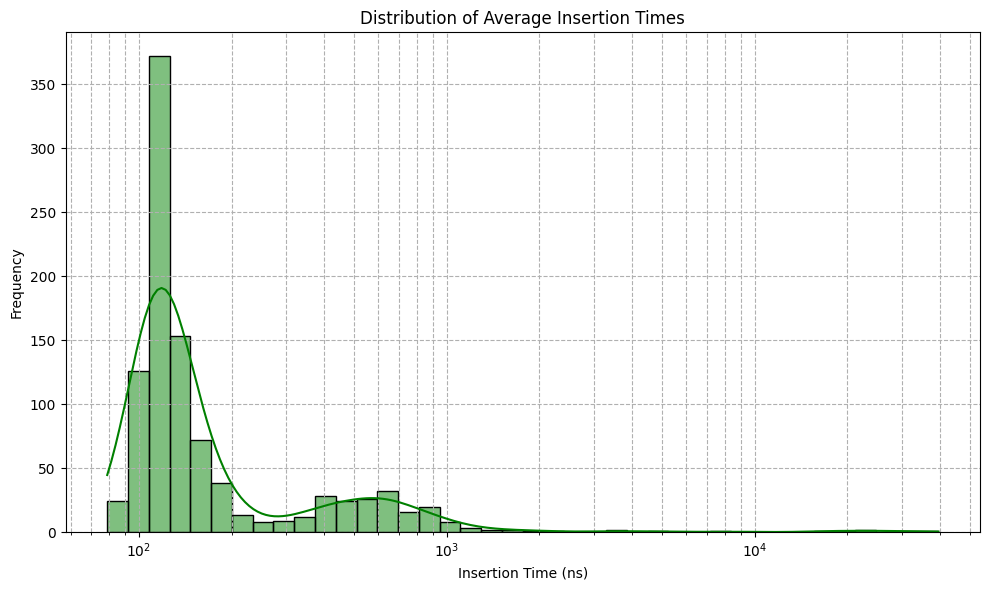

In [5]:
# Average insertion times across 1000 operations for Hash Tables

averaged_df = pd.read_csv('hash_tables/hash_table_average_set_metrics_1k.csv')

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
# plt.savefig('hash_table_average_set_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
# plt.savefig('hash_table_average_set_metrics_1k_histogram.png')
plt.show()

### Average insertion time of uuid keys in AVL Trees across 1000 operations

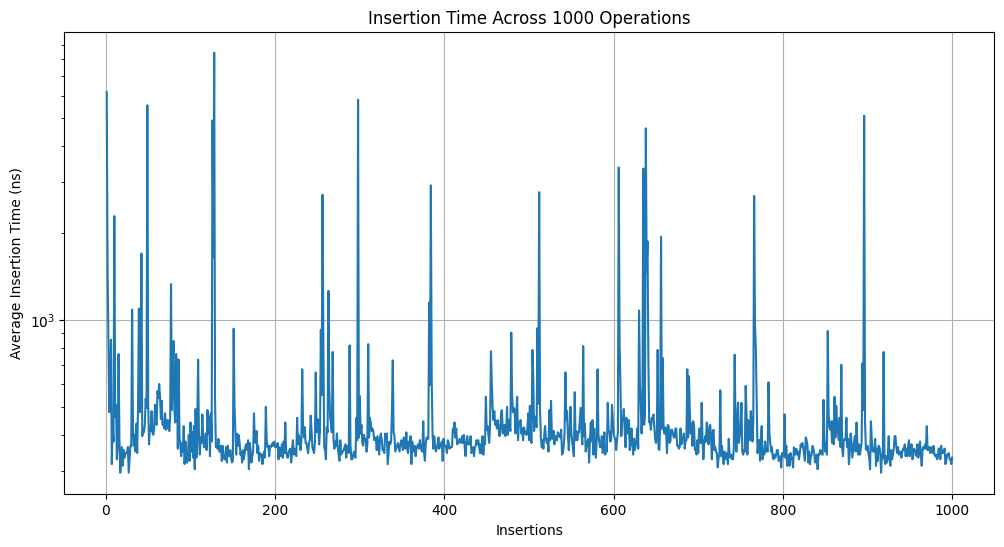

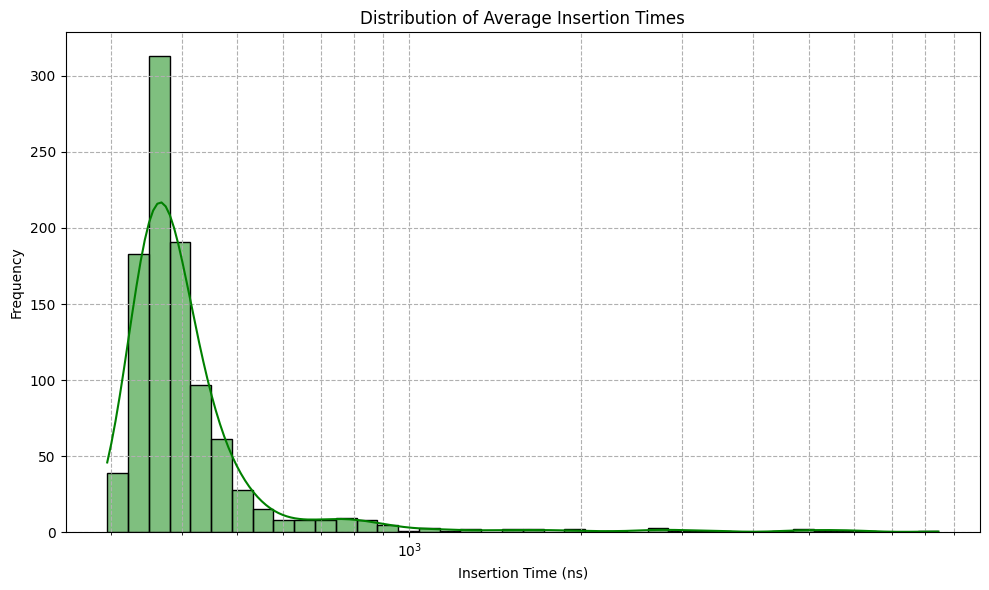

In [11]:
# Average insertion time across 1000 operations for AVL Trees

averaged_df = pd.read_csv('avl_trees/avl_tree_average_set_metrics_1k.csv')

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
# plt.savefig('avl_tree_average_set_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
# plt.savefig('avl_tree_average_set_metrics_1k_histogram.png')
plt.show()

count    1000000.000000
mean         999.351884
std          951.303673
min          125.000000
25%          667.000000
50%          917.000000
75%         1166.000000
max       462791.000000
Name: duration, dtype: float64


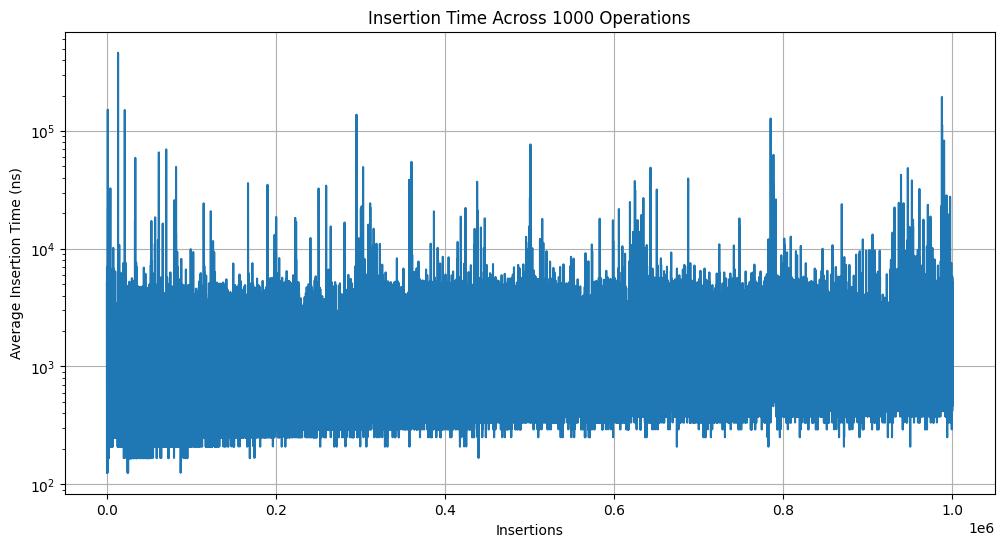

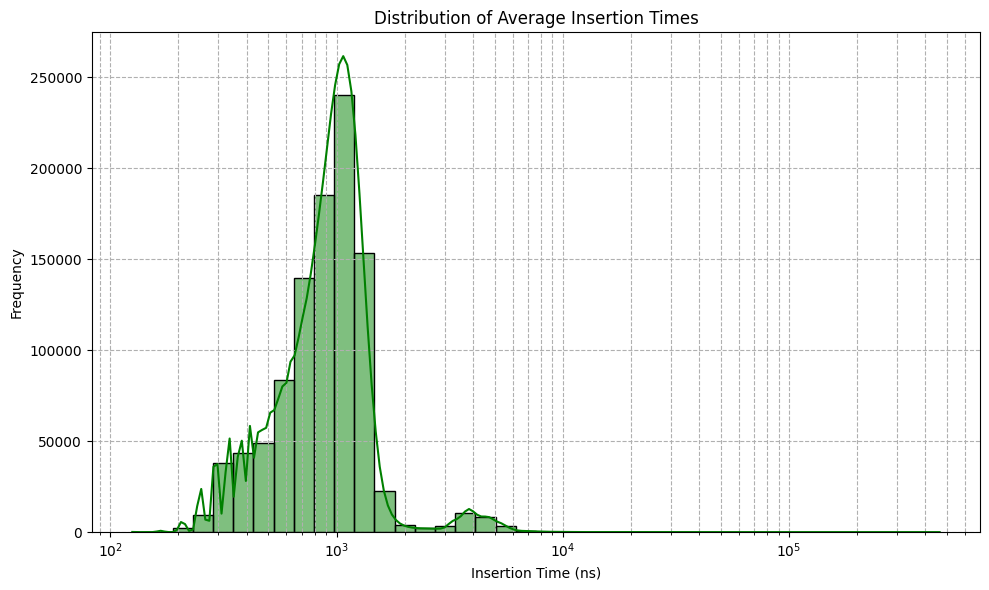

In [76]:
# Visualise individual test case file

averaged_df = pd.read_csv('../avl_tree_1M.csv')
print(averaged_df['duration'].describe())

plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='duration', data=averaged_df)
plt.title('Insertion Time Across 1000 Operations')
plt.xlabel('Insertions')
plt.ylabel('Average Insertion Time (ns)')
plt.yscale('log')
plt.grid(True)
# plt.savefig('hash_table_average_set_metrics_1k_lineplot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(averaged_df['duration'], bins=40, kde=True, color='g', log_scale=True)
plt.title('Distribution of Average Insertion Times')
plt.xlabel('Insertion Time (ns)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
# plt.savefig('hash_table_average_set_metrics_1k_histogram.png')
plt.show()